In [1]:
from mountain_car_stds import *
import rl_lib
from rl_lib.agents.features import RandomFeatureAgent, FeatureAgent


class MCAgent(RandomFeatureAgent):

    def __init__(self):
        super().__init__(state_dims=2, actions_num=3, distribution=np.random.normal, loc=np.array([0., 1000., 1]),
                         scale=[1., 10., 1])

In [2]:
results = []
max_reward = -300
max_reward_features = None

N = 100

for i in range(N):
    agent = MCAgent()
    df = run(agent, 10, verbose=1)
    
    avg_reward = average_reward(df)
    if avg_reward > max_reward:
        max_reward = avg_reward
        max_reward_features = agent.get_features()
    
    results.append(avg_reward)



Run 10 episodes in 0.05 seconds. Average reward -107.91143547863564
Run 10 episodes in 0.04 seconds. Average reward -110.65592749451082
Run 10 episodes in 0.04 seconds. Average reward -111.83703004183856
Run 10 episodes in 0.04 seconds. Average reward -113.91023595121374
Run 10 episodes in 0.04 seconds. Average reward -113.00056549403764
Run 10 episodes in 0.04 seconds. Average reward -90.54613743842552
Run 10 episodes in 0.04 seconds. Average reward -114.63736942302839
Run 10 episodes in 0.04 seconds. Average reward -104.78776081264384
Run 10 episodes in 0.04 seconds. Average reward -113.36876861310921
Run 10 episodes in 0.04 seconds. Average reward -114.32797560093832
Run 10 episodes in 0.05 seconds. Average reward -115.44168980107536
Run 10 episodes in 0.04 seconds. Average reward -110.0246089625509
Run 10 episodes in 0.04 seconds. Average reward -120.81093711039925
Run 10 episodes in 0.04 seconds. Average reward -107.54046243702479
Run 10 episodes in 0.04 seconds. Average reward -1

-90.54613743842552 (array([-9.22538159e-01,  1.01581963e+03]), 0.5239653573390108)


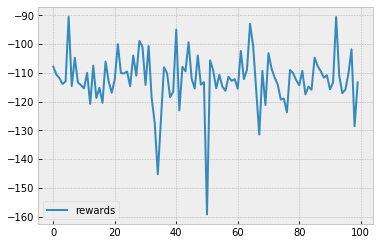

In [3]:
print(max_reward, max_reward_features)
plt.plot(results, label='rewards')
plt.grid(True)
plt.legend()
plt.show()


(array([-9.22538159e-01,  1.01581963e+03]), 0.5239653573390108)


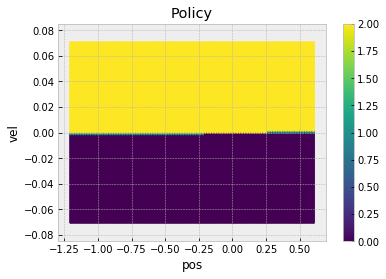

In [4]:
alpha, beta = max_reward_features
best_agent = FeatureAgent(np.append(alpha, beta), 3, include_beta=True)
print(best_agent.get_features())
plot_policy(best_agent)